# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the Excel file

In [2]:
df = pd.read_excel("/content/Pre-Super_Day_candidate_dataset__28candidate_29.xlsx")

# 1. Explore the variables relationship with approvability

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User ID                     100000 non-null  object
 1   applications                100000 non-null  int64 
 2   Reason                      100000 non-null  object
 3   Loan_Amount                 100000 non-null  int64 
 4   FICO_score                  100000 non-null  int64 
 5   Fico_Score_group            100000 non-null  object
 6   Employment_Status           100000 non-null  object
 7   Employment_Sector           93593 non-null   object
 8   Monthly_Gross_Income        100000 non-null  int64 
 9   Monthly_Housing_Payment     100000 non-null  int64 
 10  Ever_Bankrupt_or_Foreclose  100000 non-null  int64 
 11  Lender                      100000 non-null  object
 12  Approved                    100000 non-null  int64 
 13  bounty                      10

In [4]:
df.describe()

,applications,Loan_Amount,FICO_score,Monthly_Gross_Income,Monthly_Housing_Payment,Ever_Bankrupt_or_Foreclose,Approved,bounty
count,100000.0,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.0,45234.350000,629.34961,5871.899350,1649.693970,0.022460,0.109760,26.415000
std,0.0,28705.453665,88.66160,2882.939639,623.443127,0.148175,0.312592,78.385644
min,1.0,5000.000000,300.00000,2000.000000,300.000000,0.000000,0.000000,0.000000
25%,1.0,20000.000000,572.00000,3704.000000,1229.000000,0.000000,0.000000,0.000000
50%,1.0,40000.000000,634.00000,5172.500000,1665.000000,0.000000,0.000000,0.000000
75%,1.0,70000.000000,693.00000,7631.000000,2046.000000,0.000000,0.000000,0.000000
max,1.0,100000.000000,850.00000,19997.000000,3300.000000,1.000000,1.000000,350.000000


In [5]:
# Checking number of unique User IDs
len(set(df["User ID"]))

100000

In [6]:
# Dropped some columns
df.drop(columns=['applications','bounty','Fico_Score_group','User ID'],inplace=True)

In [7]:
df['Approved'].value_counts()

Approved
0    89024
1    10976
Name: count, dtype: int64

In [8]:
df['Employment_Sector'].value_counts()

Employment_Sector
information_technology    19748
health_care               12403
real_estate                9297
financials                 9262
consumer_staples           8974
industrials                7559
materials                  6748
communication_services     6655
energy                     5264
utilities                  4536
consumer_discretionary     3147
Name: count, dtype: int64

<Axes: >

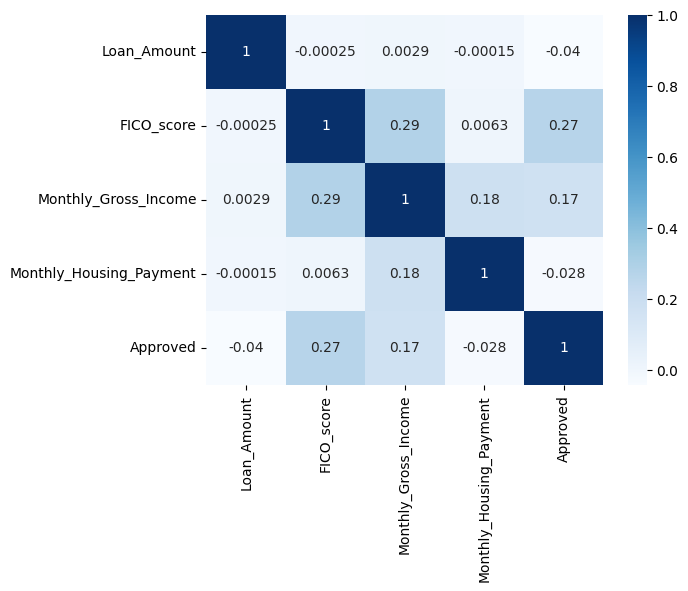

In [9]:
int_df = df[['Loan_Amount','FICO_score','Monthly_Gross_Income','Monthly_Housing_Payment','Approved']]
sns.heatmap(int_df.corr(),annot=True,cmap='Blues')

**So far it looks like FICO Score and Monthly Gross Income are the most important features. Naturally this makes sense; good credit history and higher income increases likelyhood loan will be paid.**

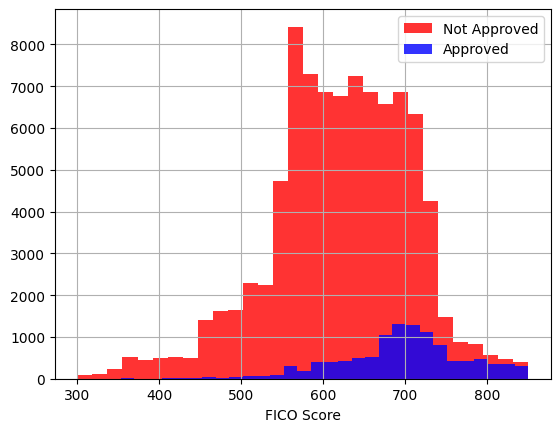

In [10]:
# Checking FICO Score versus Approved or not
plt.figure()
df[df['Approved'] == 0]['FICO_score'].hist(alpha = 0.8,color = 'red', bins = 30,label = 'Not Approved')
df[df['Approved'] == 1]['FICO_score'].hist(alpha = 0.8,color = 'blue', bins = 30,label = 'Approved')
plt.legend()
plt.xlabel('FICO Score')
plt.show()

**FICO Score clearly higher on average for approved loans.**

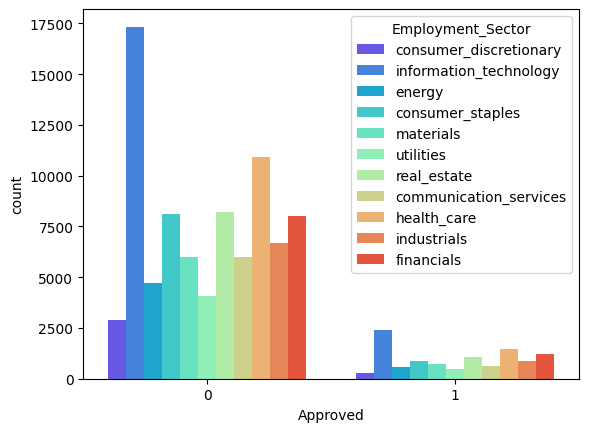

In [11]:
# Approved grouped by Employment Sector
sns.countplot(x='Approved', hue = 'Employment_Sector', data=df, palette='rainbow')
plt.show()

# 2. Tell us about the lenders approval rates

In [12]:
df = pd.read_excel("/content/Pre-Super_Day_candidate_dataset__28candidate_29.xlsx")

In [13]:
df['Lender'] = df['Lender'].astype("string")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User ID                     100000 non-null  object
 1   applications                100000 non-null  int64 
 2   Reason                      100000 non-null  object
 3   Loan_Amount                 100000 non-null  int64 
 4   FICO_score                  100000 non-null  int64 
 5   Fico_Score_group            100000 non-null  object
 6   Employment_Status           100000 non-null  object
 7   Employment_Sector           93593 non-null   object
 8   Monthly_Gross_Income        100000 non-null  int64 
 9   Monthly_Housing_Payment     100000 non-null  int64 
 10  Ever_Bankrupt_or_Foreclose  100000 non-null  int64 
 11  Lender                      100000 non-null  string
 12  Approved                    100000 non-null  int64 
 13  bounty                      10

In [15]:
# Approval count for each Lender
df.groupby('Lender')['Approved'].value_counts()

Lender  Approved
A       0           48969
        1            6031
B       0           25540
        1            1960
C       0           14515
        1            2985
Name: count, dtype: int64

In [16]:
# Approval rate for each Lender
df.groupby('Lender')['Approved'].value_counts()/df.groupby('Lender')['Approved'].count()

Lender  Approved
A       0           0.890345
        1           0.109655
B       0           0.928727
        1           0.071273
C       0           0.829429
        1           0.170571
dtype: float64

**Lender C has highest approval rate followed by Lender A, then Lender C.**

In [17]:
dfA = df[df['Lender']=='A']
dfB = df[df['Lender']=='B']
dfC = df[df['Lender']=='C']

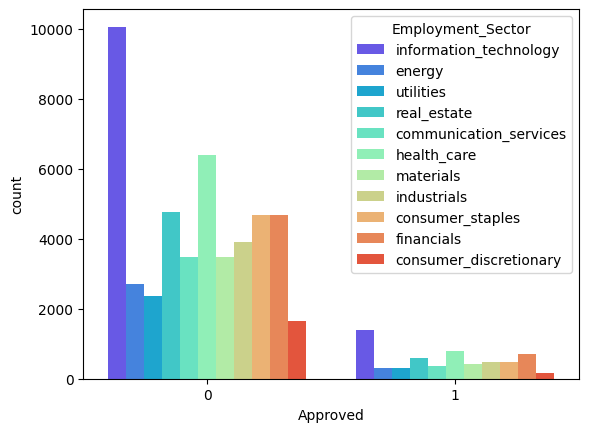

In [18]:
sns.countplot(x='Approved', hue = 'Employment_Sector', data=dfA, palette='rainbow')
plt.show()

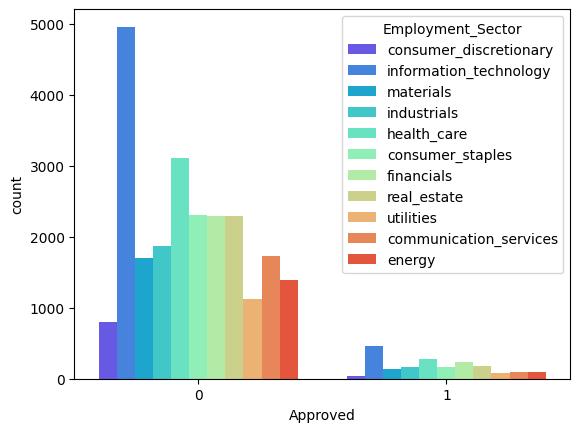

In [19]:
sns.countplot(x='Approved', hue = 'Employment_Sector', data=dfB, palette='rainbow')
plt.show()

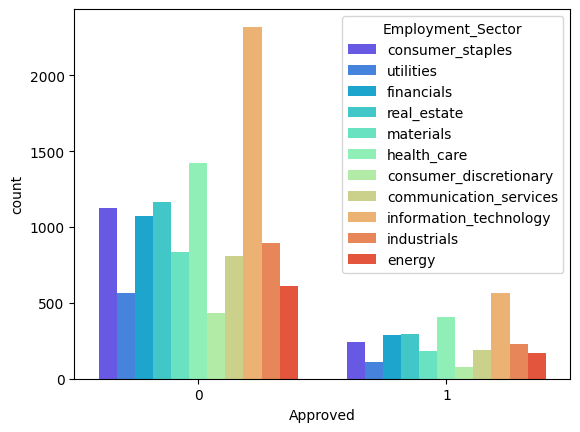

In [20]:
sns.countplot(x='Approved', hue = 'Employment_Sector', data=dfC, palette='rainbow')
plt.show()

Lender A approves mainly applicants in info tech, real estate, health care, and consumer staple sector.

Lender B approves mainly applicants in info tech, health care, and financials sector.

Lender C approves mainly applicants in info tech, health care, financials, real estate, and consumer staples sector.

<Axes: >

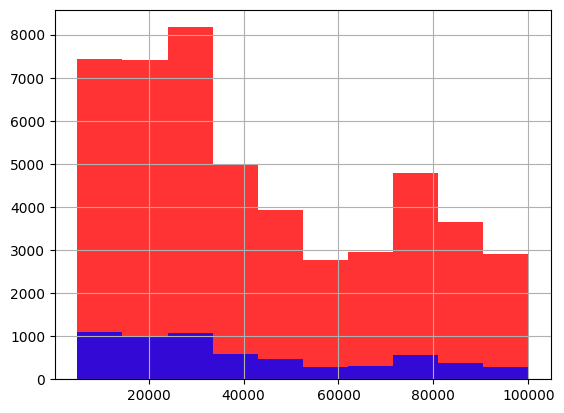

In [21]:
dfA[dfA['Approved'] == 0]['Loan_Amount'].hist(alpha = 0.8,color = 'red', bins = 10,label = 'Not Approved')
dfA[dfA['Approved'] == 1]['Loan_Amount'].hist(alpha = 0.8,color = 'blue', bins = 10,label = 'Approved')

<Axes: >

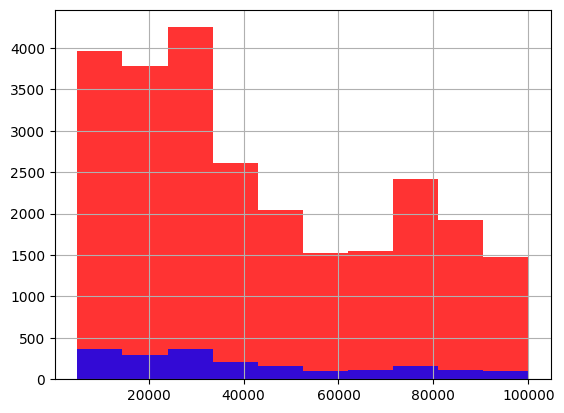

In [22]:
dfB[dfB['Approved'] == 0]['Loan_Amount'].hist(alpha = 0.8,color = 'red', bins = 10,label = 'Not Approved')
dfB[dfB['Approved'] == 1]['Loan_Amount'].hist(alpha = 0.8,color = 'blue', bins = 10,label = 'Approved')

<Axes: >

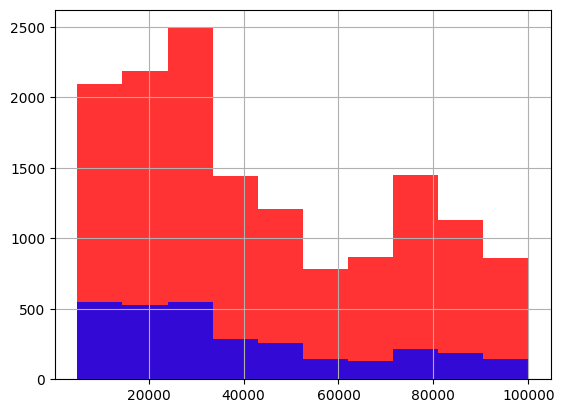

In [23]:
dfC[dfC['Approved'] == 0]['Loan_Amount'].hist(alpha = 0.8,color = 'red', bins = 10,label = 'Not Approved')
dfC[dfC['Approved'] == 1]['Loan_Amount'].hist(alpha = 0.8,color = 'blue', bins = 10,label = 'Approved')

<Axes: >

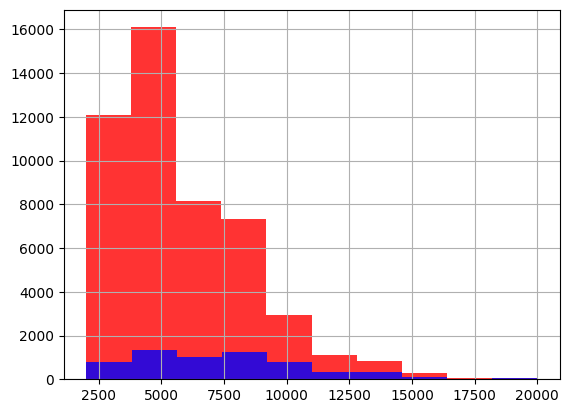

In [24]:
dfA[dfA['Approved'] == 0]['Monthly_Gross_Income'].hist(alpha = 0.8,color = 'red', bins = 10,label = 'Not Approved')
dfA[dfA['Approved'] == 1]['Monthly_Gross_Income'].hist(alpha = 0.8,color = 'blue', bins = 10,label = 'Approved')

<Axes: >

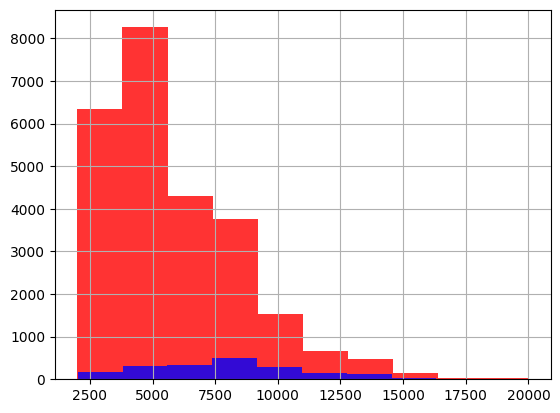

In [25]:
dfB[dfB['Approved'] == 0]['Monthly_Gross_Income'].hist(alpha = 0.8,color = 'red', bins = 10,label = 'Not Approved')
dfB[dfB['Approved'] == 1]['Monthly_Gross_Income'].hist(alpha = 0.8,color = 'blue', bins = 10,label = 'Approved')

<Axes: >

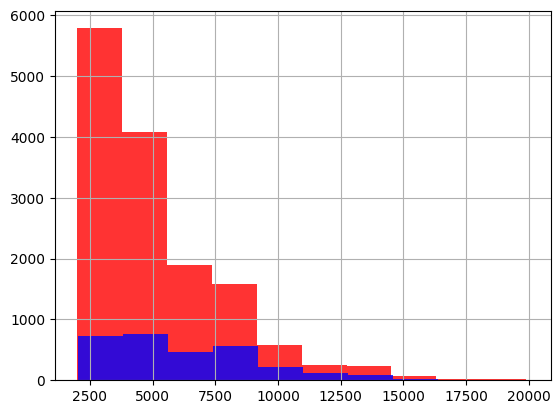

In [26]:
dfC[dfC['Approved'] == 0]['Monthly_Gross_Income'].hist(alpha = 0.8,color = 'red', bins = 10,label = 'Not Approved')
dfC[dfC['Approved'] == 1]['Monthly_Gross_Income'].hist(alpha = 0.8,color = 'blue', bins = 10,label = 'Approved')

# 3. Evaluate which customers we should match to each lender to maximize Revenue Per Application

We should match customers that are more likely to be approved for each lender by looking at the current data. Some important features are Employment Sector, Monthly Gross Income, and Loan Amount.

In [27]:
df.head()

,User ID,applications,Reason,Loan_Amount,FICO_score,Fico_Score_group,Employment_Status,Employment_Sector,Monthly_Gross_Income,Monthly_Housing_Payment,Ever_Bankrupt_or_Foreclose,Lender,Approved,bounty
0,00007820-89cb-4c1d-9940-eb270d605a35,1,cover_an_unexpected_cost,100000,669,fair,full_time,consumer_discretionary,5024,927,0,B,0,0
1,00012b55-514c-421e-9c76-3300abbc1134,1,credit_card_refinancing,70000,594,fair,full_time,information_technology,5764,1177,0,B,0,0
2,000157c1-b6a3-4c86-82c7-9ec1bda3799a,1,home_improvement,10000,596,fair,full_time,information_technology,4017,1487,0,A,0,0
3,00020400-efab-4b10-8812-2a0aaf774841,1,home_improvement,100000,642,fair,part_time,energy,3129,904,0,A,0,0
4,0002f737-0cda-48fb-91ed-533f3d0eab05,1,major_purchase,30000,642,fair,full_time,energy,4220,1620,0,A,0,0


In [28]:
df_encoded = pd.get_dummies(df, columns=['Reason','Employment_Status','Employment_Sector'],drop_first = True)

In [29]:
df.drop(['Reason','Employment_Status','Employment_Sector'], axis = 1, inplace =True)

In [30]:
df.head()

,User ID,applications,Loan_Amount,FICO_score,Fico_Score_group,Monthly_Gross_Income,Monthly_Housing_Payment,Ever_Bankrupt_or_Foreclose,Lender,Approved,bounty
0,00007820-89cb-4c1d-9940-eb270d605a35,1,100000,669,fair,5024,927,0,B,0,0
1,00012b55-514c-421e-9c76-3300abbc1134,1,70000,594,fair,5764,1177,0,B,0,0
2,000157c1-b6a3-4c86-82c7-9ec1bda3799a,1,10000,596,fair,4017,1487,0,A,0,0
3,00020400-efab-4b10-8812-2a0aaf774841,1,100000,642,fair,3129,904,0,A,0,0
4,0002f737-0cda-48fb-91ed-533f3d0eab05,1,30000,642,fair,4220,1620,0,A,0,0


In [31]:
dft = pd.concat([int_df,df_encoded], axis = 1)

In [32]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column                                    Non-Null Count   Dtype 
---  ------                                    --------------   ----- 
 0   Loan_Amount                               100000 non-null  int64 
 1   FICO_score                                100000 non-null  int64 
 2   Monthly_Gross_Income                      100000 non-null  int64 
 3   Monthly_Housing_Payment                   100000 non-null  int64 
 4   Approved                                  100000 non-null  int64 
 5   User ID                                   100000 non-null  object
 6   applications                              100000 non-null  int64 
 7   Loan_Amount                               100000 non-null  int64 
 8   FICO_score                                100000 non-null  int64 
 9   Fico_Score_group                          100000 non-null  object
 10  Monthly_Gross_Income             

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User ID                     100000 non-null  object
 1   applications                100000 non-null  int64 
 2   Loan_Amount                 100000 non-null  int64 
 3   FICO_score                  100000 non-null  int64 
 4   Fico_Score_group            100000 non-null  object
 5   Monthly_Gross_Income        100000 non-null  int64 
 6   Monthly_Housing_Payment     100000 non-null  int64 
 7   Ever_Bankrupt_or_Foreclose  100000 non-null  int64 
 8   Lender                      100000 non-null  string
 9   Approved                    100000 non-null  int64 
 10  bounty                      100000 non-null  int64 
dtypes: int64(8), object(2), string(1)
memory usage: 8.4+ MB


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Reason','Employment_Status','Employment_Sector','Lender','Approved'], axis=1), dft['Approved'], test_size = 0.25, random_state=42)

KeyError: "['Reason', 'Employment_Status', 'Employment_Sector'] not found in axis"

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train,y_train)

In [ ]:
predictions = logmodel.predict(X_test)

Ran into some issues with the Training sets, but this would allow us to train a logistic regression model onto our data to predict how effective it is.